ASSIGNMENT-4

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
car=pd.read_csv(r'/content/car data.csv',header=0)

In [7]:
car.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
car.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [10]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
car.shape

(301, 9)

In [12]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
car_dup = car[car.duplicated(keep='last')]
car_dup.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
15      Dealer       Manual      0  
51      Dealer    Automatic      0

In [15]:
car = car.drop_duplicates()
car.shape

(299, 9)

In [16]:
car = car.reset_index(drop=True)
car_bk = car.copy()

In [17]:
car['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

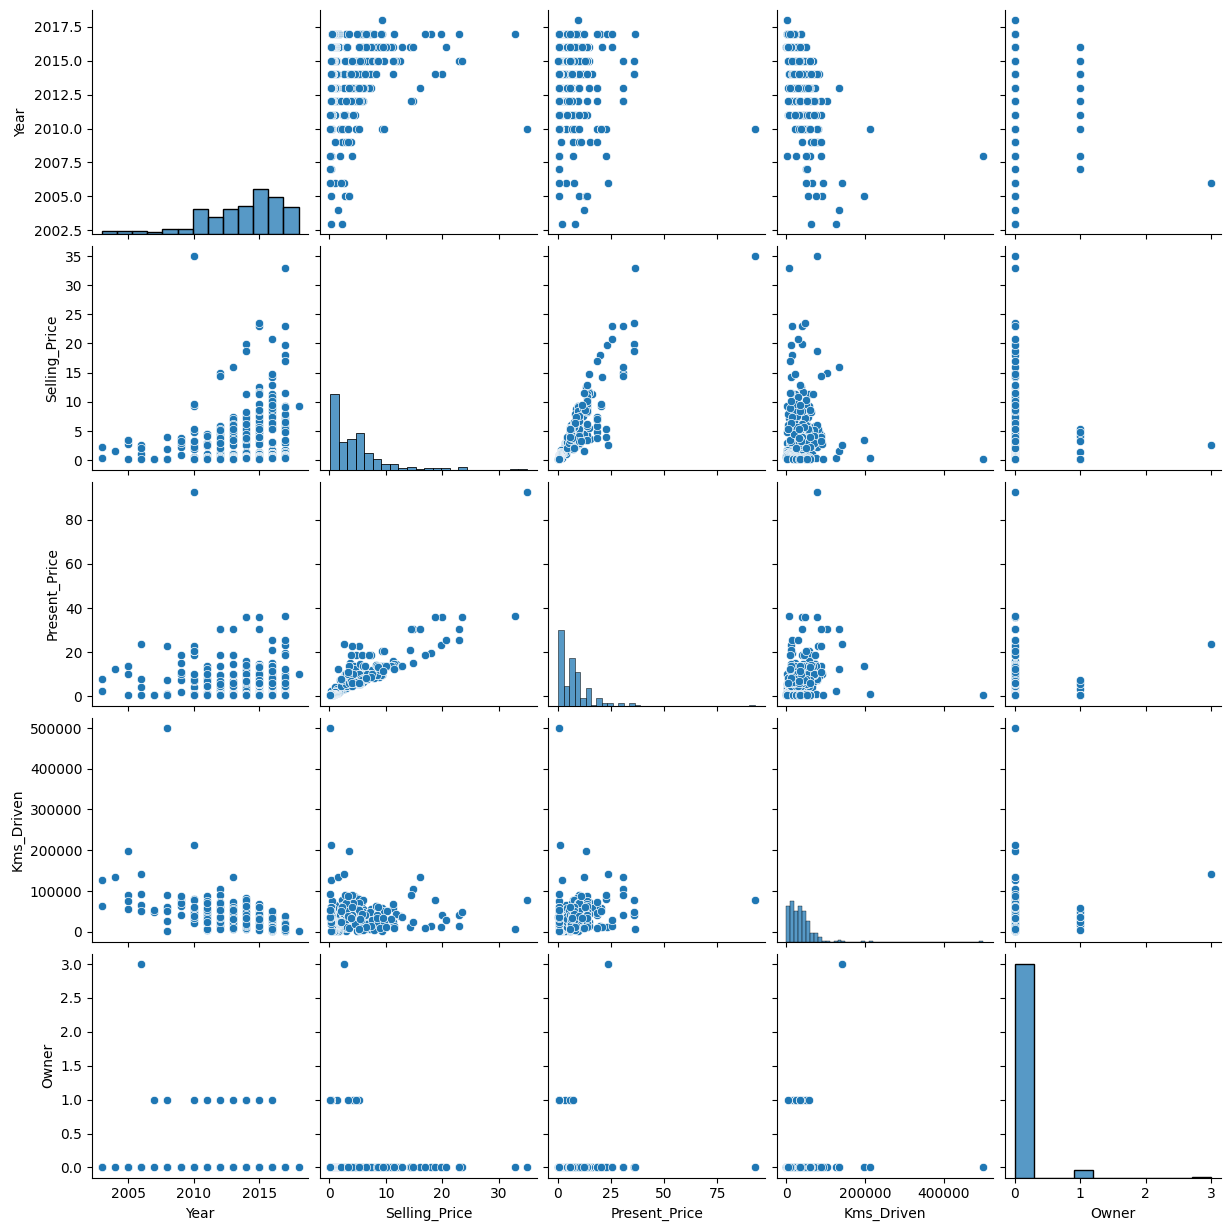

In [18]:
sns.pairplot(car)

<ipython-input-19-5ab3b4b3b961>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

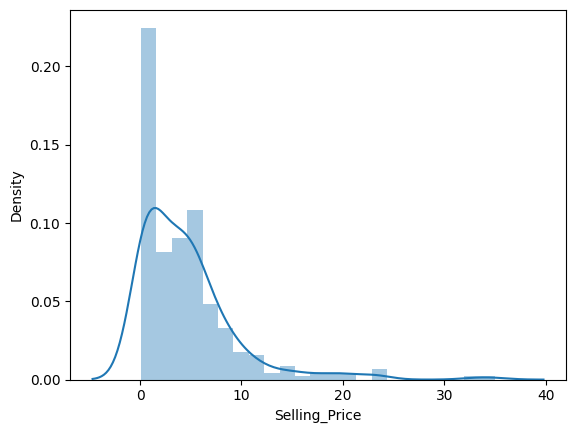

In [19]:
sns.distplot(car['Selling_Price'])

<ipython-input-20-0aca3f9f39cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr())


<Axes: >

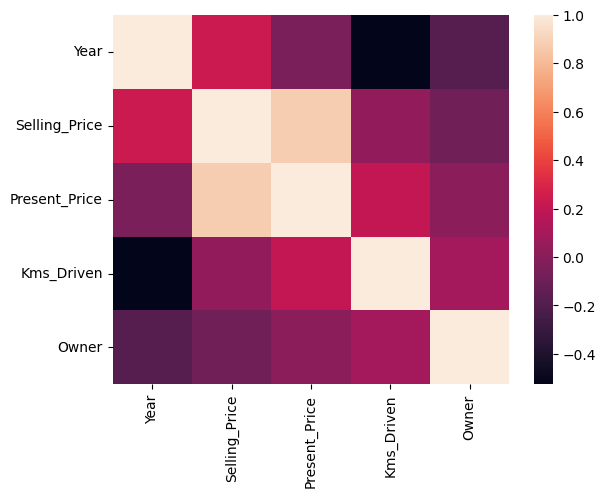

In [20]:
sns.heatmap(car.corr())

In [22]:
from sklearn.preprocessing import LabelEncoder
cols=car.select_dtypes(include=['object']).columns
print(cols)
le=LabelEncoder()
car[cols]=car[cols].apply(le.fit_transform)
print(car.head())

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85        6900          2   
3        96  2011           2.85           4.15        5200          2   
4        92  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             1      0  
1            0             1      0  
2            0             1      0  
3            0             1      0  
4            0             1      0  


In [23]:
car_data = car.drop(columns = ['Car_Name','Present_Price','Owner'])
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Kms_Driven     299 non-null    int64  
 3   Fuel_Type      299 non-null    int64  
 4   Seller_Type    299 non-null    int64  
 5   Transmission   299 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.1 KB


In [25]:
x = car.drop(columns = 'Selling_Price')
y = car.Selling_Price

In [26]:
x.head()

Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0        90  2014           5.59       27000          2            0   
1        93  2013           9.54       43000          1            0   
2        68  2017           9.85        6900          2            0   
3        96  2011           4.15        5200          2            0   
4        92  2014           6.87       42450          1            0   

   Transmission  Owner  
0             1      0  
1             1      0  
2             1      0  
3             1      0  
4             1      0

In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((209, 8), (90, 8), (209,), (90,))

In [29]:
from sklearn.linear_model import LinearRegression
ModelRGR = LinearRegression()
ModelRGR.fit(x_train, y_train)
y_pred = ModelRGR.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

Mean Absolute Error (MAE): 1.458
Mean Squared Error (MSE): 5.599
Root Mean Squared Error (RMSE): 2.366


In [30]:
Results = pd.DataFrame({'Selling_Price_A':y_test, 'Selling_Price_P':y_pred})
ResultsFinal = car_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
170  Bajaj Pulsar 135 LS  2014           0.40           0.64       13700   
283                 jazz  2016           7.40           8.50       15059   
46               wagon r  2006           1.05           4.15       65000   
82                innova  2015          12.50          13.46       38000   
186         Hero Glamour  2013           0.25           0.57       18000   
118   Bajaj Pulsar RS200  2016           1.05           1.26        5700   
237                  eon  2012           2.00           4.43       23709   
30                  ritz  2011           2.35           4.89       54200   
247                  i20  2016           5.25           7.60       17000   
19              alto k10  2016           2.85           3.95       25000   

    Fuel_Type Seller_Type Transmission  Owner  Selling_Price_A  \
170    Petrol  Individual       Manual      0             0.40   
283    Petrol      Dealer    Automatic      0             7.40   
46     Petrol      Dealer       Manual      0             1.05   
82     Diesel      Dealer       Manual      0            12.50   
186    Petrol  Individual       Manual      0             0.25   
118    Petrol  Individual       Manual      0             1.05   
237    Petrol      Dealer       Manual      0             2.00   
30     Petrol      Dealer       Manual      0             2.35   
247    Petrol      Dealer       Manual      0             5.25   
19     Petrol      Dealer       Manual      0             2.85   

     Selling_Price_P  
170         0.396642  
283         7.987662  
46          0.387513  
82          8.770492  
186         0.049522  
118         1.462699  
237         2.772488  
30          2.481314  
247         5.676907  
19          3.827843

In [31]:
del ResultsFinal['Selling_Price_A']
ResultsFinal.sample(5)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
10        alto 800  2017           2.85           3.60        2135    Petrol   
33           dzire  2014           5.50           8.06       45000    Diesel   
285          amaze  2015           5.75           7.50       44000    Petrol   
255           city  2015           8.50          13.60       40324    Petrol   
93   corolla altis  2012           5.85          18.61       72000    Petrol   

    Seller_Type Transmission  Owner  Selling_Price_P  
10       Dealer       Manual      0         4.215409  
33       Dealer       Manual      0         5.884279  
285      Dealer    Automatic      0         6.753117  
255      Dealer       Manual      0         7.632625  
93       Dealer       Manual      0         8.531468

In [32]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
cd=pd.read_csv(r"/CAR DETAILS FROM CAR DEKHO.csv",header=0)

In [46]:
cd.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [47]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [48]:
cd.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [53]:
cd.shape

(4340, 8)

In [54]:
cd_dup=car[car.duplicated(keep='last')]
cd_dup

name  year  selling_price  km_driven    fuel  \
0                      Maruti 800 AC  2007          60000      70000  Petrol   
1           Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2               Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3             Datsun RediGO T Option  2017         250000      46000  Petrol   
4              Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
...                              ...   ...            ...        ...     ...   
4251  Renault Duster 85PS Diesel RxE  2013         425000     170000  Diesel   
4252           Maruti Swift VDI BSIV  2015         495000     105000  Diesel   
4253          Maruti Ertiga SHVS VDI  2017         890000      60000  Diesel   
4254    Hyundai Verna CRDi 1.6 AT EX  2018        1100000      25000  Diesel   
4255          Mahindra XUV500 W8 2WD  2014         650000     218000  Diesel   

     seller_type transmission         owner  
0     Individual       Manual   First Owner  
1     Individual       Manual   First Owner  
2     Individual       Manual   First Owner  
3     Individual       Manual   First Owner  
4     Individual       Manual  Second Owner  
...          ...          ...           ...  
4251      Dealer       Manual   First Owner  
4252      Dealer       Manual   First Owner  
4253  Individual       Manual  Second Owner  
4254  Individual    Automatic  Second Owner  
4255  Individual       Manual  Second Owner  

[763 rows x 8 columns]

In [55]:
cd_dup=cd.drop_duplicates()
cd.shape

(4340, 8)

In [56]:
cd.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [57]:
cd['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [49]:
cd.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

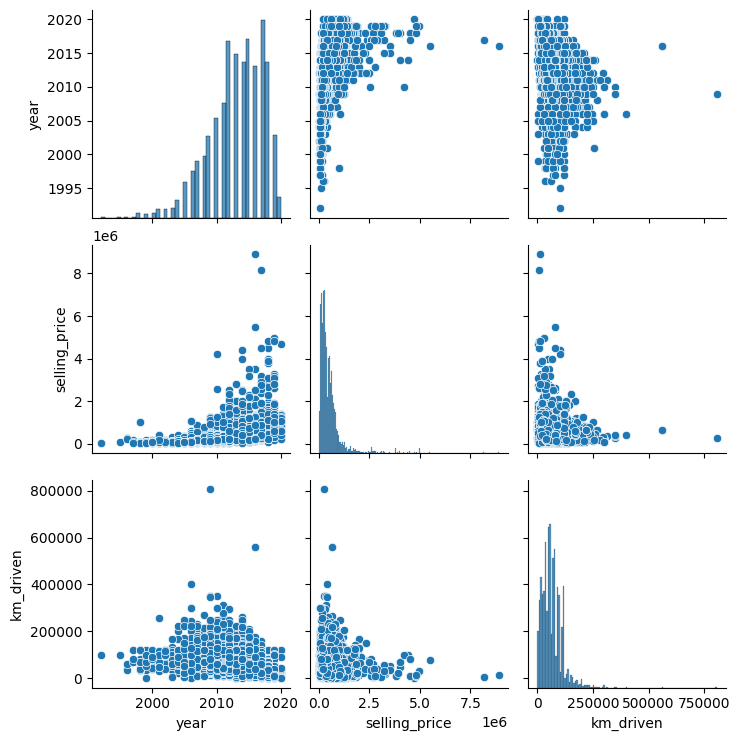

In [50]:
sns.pairplot(cd)

<ipython-input-51-eb6f5add54c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cd['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

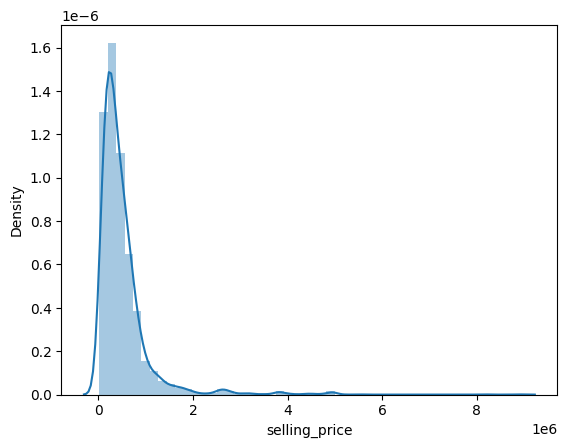

In [51]:
sns.distplot(cd['selling_price'])

<ipython-input-52-e084a426b539>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cd.corr())


<Axes: >

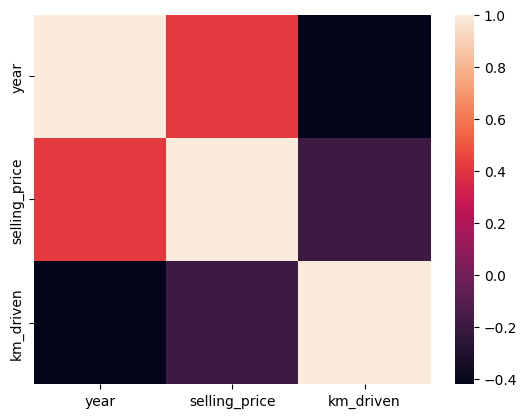

In [52]:
sns.heatmap(cd.corr())

In [58]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
car['owner']=LE.fit_transform(car['owner'])
car['fuel']=LE.fit_transform(car['fuel'])
car['seller_type']=LE.fit_transform(car['seller_type'])
car['transmission']=LE.fit_transform(car['transmission'])

In [59]:
car.head()

name  year  selling_price  km_driven  fuel  \
0             Maruti 800 AC  2007          60000      70000     4   
1  Maruti Wagon R LXI Minor  2007         135000      50000     4   
2      Hyundai Verna 1.6 SX  2012         600000     100000     1   
3    Datsun RediGO T Option  2017         250000      46000     4   
4     Honda Amaze VX i-DTEC  2014         450000     141000     1   

   seller_type  transmission  owner  
0            1             1      0  
1            1             1      0  
2            1             1      0  
3            1             1      0  
4            1             1      2

In [60]:
car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel              int64
seller_type       int64
transmission      int64
owner             int64
dtype: object

In [61]:
del car['name']
car.dtypes

year             int64
selling_price    int64
km_driven        int64
fuel             int64
seller_type      int64
transmission     int64
owner            int64
dtype: object

In [63]:
indepvar=[]
for col in car.columns:
  if col!='owner':
    indepvar.append(col)
targetvar='owner'
x=car[indepvar]
y=car[targetvar]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=143)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((3038, 6), (1302, 6), (3038,), (1302,))

In [65]:
car.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [66]:
cols=['selling_price','km_driven','fuel','transmission']

In [67]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)
x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [68]:
from sklearn.linear_model import LinearRegression
modelr=LinearRegression()
modelr.fit(x_train,y_train)
y_pred=modelr.predict(x_test)

In [69]:
from sklearn import metrics
print('mean absolute error',round(metrics.mean_absolute_error(y_test,y_pred),2))

mean absolute error 0.82


In [70]:
print('mean square error',round(metrics.mean_squared_error(y_test,y_pred),2))

mean square error 1.16


In [71]:
import numpy as np
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

Root Mean Squared Error: 1.078


In [72]:
car.describe().T

count           mean            std      min        25%  \
year           4340.0    2013.090783       4.215344   1992.0    2011.00   
selling_price  4340.0  504127.311751  578548.736139  20000.0  208749.75   
km_driven      4340.0   66215.777419   46644.102194      1.0   35000.00   
fuel           4340.0       2.469124       1.508435      0.0       1.00   
seller_type    4340.0       0.794470       0.458629      0.0       1.00   
transmission   4340.0       0.896774       0.304289      0.0       1.00   
owner          4340.0       0.820276       1.233494      0.0       0.00   

                    50%       75%        max  
year             2014.0    2016.0     2020.0  
selling_price  350000.0  600000.0  8900000.0  
km_driven       60000.0   90000.0   806599.0  
fuel                1.0       4.0        4.0  
seller_type         1.0       1.0        2.0  
transmission        1.0       1.0        1.0  
owner               0.0       2.0        4.0